In [1]:
import requests
from bs4 import BeautifulSoup
import re
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36 FS"}
def get_key_url(key):
    url = 'http://sousuo.gov.cn/s.htm?t=zhengce&q='+str(key.encode()).replace(r'\x', '%').upper()[2:-1]
    return url
def get_html(url):
    r = requests.get(url=url, headers=headers)
    r.encoding = r.apparent_encoding
    print("状态：", r.raise_for_status)
    return r.text
def main():
    key = input("请输入想要搜索的关键字：")
    url = get_key_url(key)
    text = get_html(url)
    print(url)
    print(text[:100])

In [14]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36 FS"}
url = 'http://sousuo.gov.cn/s.htm?t=zhengce&q='+str('斌'.encode()).replace(r'\x', '%').upper()[2:-1]
r = requests.get(url=url, headers=headers)
r.encoding = r.apparent_encoding
r.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n\t<script id="allmobilize" charset="utf-8" src="http://ysp.www.gov.cn/013582404bd78ad3c016b8fffefe6a9a/allmobilize.min.js"></script>\r\n\t<meta http-equiv="Cache-Control" content="no-siteapp" /><link rel="alternate" media="handheld" href="#"/>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n\t<meta http-equiv="x-ua-compatible" content="IE=edge" >\r\n\t<link href="http://www.gov.cn/govweb/xhtml/favicon.ico" rel="shortcut icon" type="image/x-icon">\r\n\t<title>政策搜索结果页_中国政府网</title>\r\n\t<meta name="others" content="页面生成时间 2018-10-31 07:59:26" />\r\n\t<meta name="keywords" content="国务院文件,行政法规,部门规章,中央文件,政府白皮书,国务院公报,政策专辑">\r\n\t<meta name="description" content="中国政府网政策与法栏目发布中央和地方政府制定的法规,政策文件,中共中央有关文件,国务院公报,政府白皮书，政府信息公开，政策解读等。提供法律法规和已发布的文件的查询功能。">\r\n\t<meta name="lanmu" content="政策">

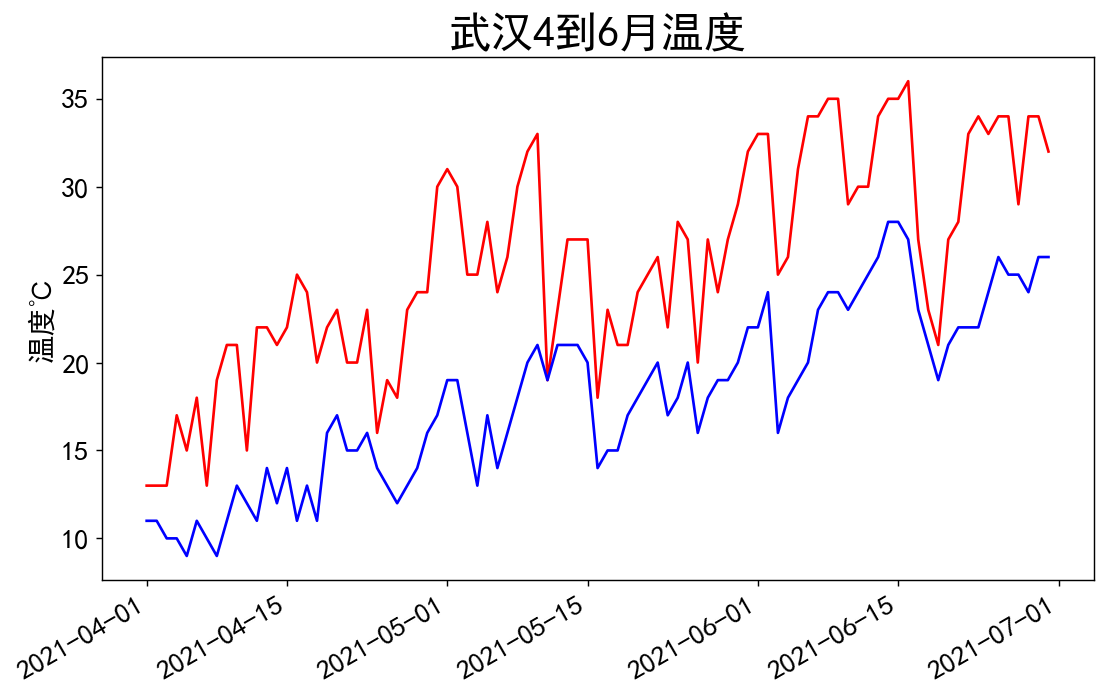

In [40]:
from matplotlib import pyplot as plt
import csv
import winreg
import os
from datetime import datetime

def get_desktop():
    key = winreg.OpenKey(winreg.HKEY_CURRENT_USER, 'Software\\Microsoft\\Windows\\CurrentVersion\\Explorer\\Shell Folders')
    return winreg.QueryValueEx(key, 'Desktop')[0]
desktop_path = get_desktop()

date, max_tem, min_tem = [], [], []
file_list = os.listdir(desktop_path+'\\weather_info\\武汉')
file_list.sort(key=lambda s:int(s[-6:-4]))
for i in file_list:
    with open(desktop_path+'\\weather_info\\武汉\\'+i, 'r', encoding='utf-8') as f:
        text = csv.reader(f)
        for line in text:
            line[0] = datetime.strptime(line[0][:10], '%Y-%m-%d')
            line = line[:3]
            line[1] = int(line[1][:-1])
            line[2] = int(line[2][:-1])
            date.append(line[0])
            max_tem.append(line[1])
            min_tem.append(line[2])
#             weather_data.append(line)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(dpi=128, figsize=(10,6))
head_title = ['日期', '最高温度', '最低温度']
plt.title("武汉4到6月温度", fontsize=24)
plt.xlabel('', fontsize=26)
plt.ylabel("温度℃", fontsize=16)
plt.plot(date, max_tem, c='red')
plt.plot(date, min_tem, c='blue')
fig.autofmt_xdate()
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
# for i in weather_data:
#     print(i)

In [20]:
type(date)

list

In [36]:
min_tem

['11',
 '11',
 '10',
 '10',
 '9',
 '11',
 '10',
 '9',
 '11',
 '13',
 '12',
 '11',
 '14',
 '12',
 '14',
 '11',
 '13',
 '11',
 '16',
 '17',
 '15',
 '15',
 '16',
 '14',
 '13',
 '12',
 '13',
 '14',
 '16',
 '17',
 '19',
 '19',
 '16',
 '13',
 '17',
 '14',
 '16',
 '18',
 '20',
 '21',
 '19',
 '21',
 '21',
 '21',
 '20',
 '14',
 '15',
 '15',
 '17',
 '18',
 '19',
 '20',
 '17',
 '18',
 '20',
 '16',
 '18',
 '19',
 '19',
 '20',
 '22',
 '22',
 '24',
 '16',
 '18',
 '19',
 '20',
 '23',
 '24',
 '24',
 '23',
 '24',
 '25',
 '26',
 '28',
 '28',
 '27',
 '23',
 '21',
 '19',
 '21',
 '22',
 '22',
 '22',
 '24',
 '26',
 '25',
 '25',
 '24',
 '26',
 '26']